In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg
/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg
/kaggle/input/satellite-image-classification/data/green_area/Forest_2838.jpg
/kaggle/input/satellite-image-classification/data/water/SeaLake_926.jpg


### Data reading:

In [3]:
os.listdir('/kaggle/input/satellite-image-classification/data/')

['cloudy', 'desert', 'green_area', 'water']

In [4]:
print(len(os.listdir('../input/satellite-image-classification/data/cloudy/')))
print(len(os.listdir('../input/satellite-image-classification/data/desert/')))
print(len(os.listdir('../input/satellite-image-classification/data/green_area/')))
print(len(os.listdir('../input/satellite-image-classification/data/water/')))

1500
1131
1500
1500


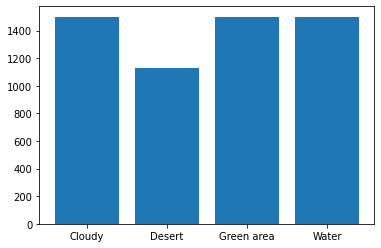

In [5]:
import matplotlib.pyplot as plt
x=['Cloudy','Desert','Green area','Water']
y=[1500,1131,1500,1500]
plt.bar(x,y);

In [6]:
import tensorflow
from tensorflow import keras
from keras.preprocessing.image import load_img, ImageDataGenerator as IDG

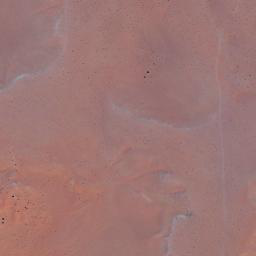

In [7]:
import cv2
load_img('/kaggle/input/satellite-image-classification/data/desert/desert(14).jpg')

### Data Preparation and Visualization:

In [8]:
import tensorflow 
from keras.models import Sequential 
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator as IDG, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory

from IPython import display 
display.set_matplotlib_formats('svg')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  


In [9]:
train_datagen = IDG(rescale=1./255,
                   fill_mode='nearest',
                   featurewise_center=True,
                   validation_split=0.2,
                   horizontal_flip=True,
                   shear_range=0.3,
                   zoom_range=0.25,
                   brightness_range=(0.4,0.7),
                   rotation_range=15,
                   featurewise_std_normalization=True,
                   )


In [10]:
train_generator= train_datagen.flow_from_directory('../input/satellite-image-classification/data',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  subset='training')

Found 4505 images belonging to 4 classes.


In [11]:
test_generator = train_datagen.flow_from_directory('../input/satellite-image-classification/data',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='binary',
                                                 subset='validation')

Found 1126 images belonging to 4 classes.


Found 5631 files belonging to 4 classes.


2022-08-09 20:29:23.537641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 20:29:23.646879: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 20:29:23.647629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 20:29:23.651129: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

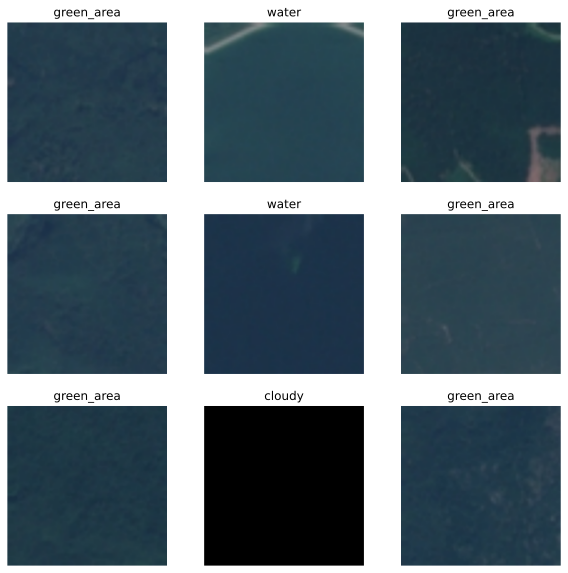

In [12]:
train_dataset = image_dataset_from_directory('../input/satellite-image-classification/data',
                                             shuffle=True,
                                             batch_size=32,image_size=(224,224))
class_name =  train_dataset.class_names
plt.figure(figsize = (10,10))
for image , label in train_dataset.take(1):
    for i in range(9) :
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[label[i]])
        plt.axis("off")

### Models:

In [13]:
from keras.applications.vgg19 import VGG19
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

In [14]:
vgg_model = VGG19(include_top=True,weights='imagenet')

for layer in vgg_model.layers:
    layer.trainable=False
    

574726144/574710816 [==============================] - 4s 0us/step


In [15]:
vgg_model = keras.Model(inputs=vgg_model.input,outputs=vgg_model.layers[-2].output)
model= keras.Sequential()

for layer in vgg_model.layers:
    model.add(layer)
    
model.add(Dense(128, activation='relu'))
model.add(Dense(4,activation='softmax'))

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [19]:
FIT =model.fit(train_generator,
    validation_data = test_generator, 
    callbacks = [early],
    epochs = 50)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50


2022-08-09 20:29:58.831549: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


141/141 [==============================] - 113s 733ms/step - loss: 1.2669 - accuracy: 0.4761 - val_loss: 0.9268 - val_accuracy: 0.7300
Epoch 2/50
141/141 [==============================] - 78s 551ms/step - loss: 0.7515 - accuracy: 0.7707 - val_loss: 0.6060 - val_accuracy: 0.8197
Epoch 3/50
141/141 [==============================] - 78s 557ms/step - loss: 0.5535 - accuracy: 0.8238 - val_loss: 0.4894 - val_accuracy: 0.8588
Epoch 4/50
141/141 [==============================] - 78s 556ms/step - loss: 0.4953 - accuracy: 0.8251 - val_loss: 0.4030 - val_accuracy: 0.8748
Epoch 5/50
141/141 [==============================] - 78s 553ms/step - loss: 0.4274 - accuracy: 0.8517 - val_loss: 0.3765 - val_accuracy: 0.8677
Epoch 6/50
141/141 [==============================] - 78s 550ms/step - loss: 0.3770 - accuracy: 0.8684 - val_loss: 0.3432 - val_accuracy: 0.8917
Epoch 7/50
141/141 [==============================] - 77s 548ms/step - loss: 0.3619 - accuracy: 0.8766 - val_loss: 0.3521 - val_accuracy: 0.

In [20]:
model.evaluate(test_generator)

36/36 [==============================] - 16s 432ms/step - loss: 0.2452 - accuracy: 0.9023


[0.24516865611076355, 0.9023090600967407]